In [1]:
# tinh toan so hoc
import pandas as pd
import numpy as np
# io
import os
# truc quan
import matplotlib.pyplot as plt
# load, process image
import cv2ka
# load model
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
# dataflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# inline
%matplotlib inline

import warnings
# Tắt tất cả cảnh báo
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# image shape
IMAGE_SIZE = 224
CHANNELS = 3

In [3]:
# data
train_df = pd.read_csv('/kaggle/input/processed-df-fashion-dataset/train.csv')
valid_df = pd.read_csv('/kaggle/input/processed-df-fashion-dataset/valid.csv')
test_df = pd.read_csv('/kaggle/input/processed-df-fashion-dataset/test.csv')

In [4]:
def load_image(path):
    image_arr = cv2.imread(path)
    image_arr = cv2.cvtColor(image_arr, cv2.COLOR_RGB2BGR)
    image_arr = cv2.resize(image_arr, (IMAGE_SIZE, IMAGE_SIZE))
    return image_arr

In [5]:
test_df['filename'] = test_df['filename'].apply(lambda filename:os.path.join('/kaggle/input', filename))

In [6]:
test_df

,id,gender,masterCategory,categorical,articleType,baseColour,season,year,usage,productDisplayName,filename,link
0,56049,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Full Finish Longwear Wicked Brown Lip...,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/assets/images/560...
1,41681,Women,Footwear,Shoes,Heels,Silver,Winter,2012.0,Casual,Catwalk Women Silver Heels,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...
2,43513,Women,Apparel,Dress,Dresses,Orange,Summer,2012.0,Casual,French Connection Women Orange Dress,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...
3,30576,Men,Accessories,Eyewear,Sunglasses,Black,Winter,2016.0,Casual,Opium Men Aviator Black Sunglass,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...
4,8444,Women,Apparel,Topwear,Tshirts,Green,Fall,2011.0,Casual,Jealous 21 Women Jealous Eirny Green Top Green...,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,27425,Women,Apparel,Loungewear and Nightwear,Lounge Shorts,Navy Blue,Winter,2015.0,Casual,Jockey Women Navy Blue Lounge Shorts,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...
1360,44198,Women,Footwear,Flip Flops,Flip Flops,Black,Winter,2012.0,Casual,iPanema Women Black Flip Flops,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...
1361,29223,Men,Accessories,Socks,Socks,White,Fall,2014.0,Sports,Fila Men Pack Of 3 Socks,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...
1362,55905,Women,Personal Care,Nails,Nail Polish,Peach,Spring,2017.0,Casual,Colorbar Theme For a Dream Nail Lacquer 13,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/assets/images/559...


In [7]:
test_df['filename'][0]

'/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/56049.jpg'

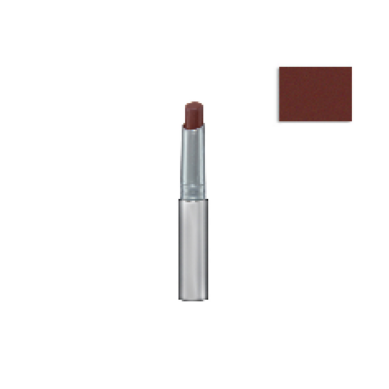

In [8]:
path = test_df['filename'][0]
image_arr = load_image(path)
plt.imshow(image_arr)
plt.axis('off')
plt.show()


In [9]:
test_df.head(1)

,id,gender,masterCategory,categorical,articleType,baseColour,season,year,usage,productDisplayName,filename,link
0,56049,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Full Finish Longwear Wicked Brown Lip...,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/assets/images/560...


In [10]:
# as data source
train_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='kaggle_filename',
    y_col='categorical',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


KeyError: 'kaggle_filename'

In [12]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='categorical',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1364 validated image filenames belonging to 20 classes.


In [13]:
path = '/kaggle/input/best-model-extraction/vgg19-1683902131_loss_opti.hdf5'
extractor = load_model(path)

In [ ]:
extractor.evaluate(test_generator)

In [11]:
extractor.evaluate(train_generator)

NameError: name 'extractor' is not defined

In [19]:
# indices to class
class_indices = test_generator.class_indices
indices_class = {v: k for k, v in class_indices.items()}

In [50]:
test_df.columns

Index(['id', 'gender', 'masterCategory', 'categorical', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'filename', 'link', 'predicted_categorical', 'hashcode'],
      dtype='object')

In [51]:
test_df['link'][0]

'http://assets.myntassets.com/assets/images/56049/2019/1/11/b85fd403-9b74-42b0-b448-32f891c972461547191235962-Colorbar-Full-Finish-Longwear-Wicked-Brown-Lipstick-02-83815-1.jpg'

1/1 [==============================] - 5s 5s/step
prediction label: Lips
true label: Lips


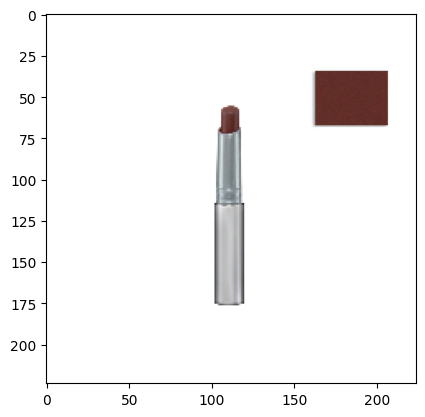

In [33]:
# test du doan
path = os.path.join('/kaggle/input', test_df['filename'][0])
image_arr = load_image(path)
y_hat = extractor.predict(image_arr.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
predicted_indices = y_hat.argmax()
predicted_class = indices_class[predicted_indices]
print('prediction label: %s' % predicted_class)
print('true label: %s' % test_df['categorical'][0])
plt.imshow(image_arr)
plt.show()

In [167]:
# hash code

In [14]:
hashcode_extractor = Model(inputs=extractor.input, outputs=extractor.layers[-4].output)

In [15]:
hashcodes = hashcode_extractor.predict_generator(test_generator)

In [16]:
features = extractor.predict_generator(test_generator)

In [17]:
predicted_indices = np.argmax(features, axis=1)

In [20]:
test_df['predicted_categorical'] = [indices_class[idx] for idx in predicted_indices]

In [21]:
test_df

,id,gender,masterCategory,categorical,articleType,baseColour,season,year,usage,productDisplayName,filename,link,predicted_categorical
0,56049,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Full Finish Longwear Wicked Brown Lip...,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/assets/images/560...,Lips
1,41681,Women,Footwear,Shoes,Heels,Silver,Winter,2012.0,Casual,Catwalk Women Silver Heels,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,Shoes
2,43513,Women,Apparel,Dress,Dresses,Orange,Summer,2012.0,Casual,French Connection Women Orange Dress,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,Dress
3,30576,Men,Accessories,Eyewear,Sunglasses,Black,Winter,2016.0,Casual,Opium Men Aviator Black Sunglass,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,Eyewear
4,8444,Women,Apparel,Topwear,Tshirts,Green,Fall,2011.0,Casual,Jealous 21 Women Jealous Eirny Green Top Green...,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,Topwear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,27425,Women,Apparel,Loungewear and Nightwear,Lounge Shorts,Navy Blue,Winter,2015.0,Casual,Jockey Women Navy Blue Lounge Shorts,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,Bottomwear
1360,44198,Women,Footwear,Flip Flops,Flip Flops,Black,Winter,2012.0,Casual,iPanema Women Black Flip Flops,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,Flip Flops
1361,29223,Men,Accessories,Socks,Socks,White,Fall,2014.0,Sports,Fila Men Pack Of 3 Socks,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,Socks
1362,55905,Women,Personal Care,Nails,Nail Polish,Peach,Spring,2017.0,Casual,Colorbar Theme For a Dream Nail Lacquer 13,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/assets/images/559...,Nails


In [22]:
(test_df['categorical'] == test_df['predicted_categorical']).sum()

1242

In [23]:
hashcodes = np.where(hashcodes<0.5, -1, 1)

In [25]:
hashcodes[0].shape

(1024,)

In [26]:
test_df['hashcode'] = list(hashcodes)

In [33]:
len(test_df.hashcode[0])

1024

In [30]:
path = '/kaggle/working/test_df_withhashcode.csv'
test_df.to_csv(path, index=False)

In [31]:
df_tmp = pd.read_csv('/kaggle/working/test_df_withhashcode.csv')
df_tmp.shape

(1364, 14)

In [32]:
len(df_tmp.hashcode[0])

23

In [240]:
class CBIR:
    def __init__(self, hashcode_extractor, df):
        self.df = df
        self.hashcode_extractor = hashcode_extractor
    
    def ranking(self, path, k):
        hashcode_query = self.extracting(path)
        scores = []
        for hashcode in self.df['hashcode']:
            dist = self.hamming_distance(hashcode_query, hashcode)
            scores.append(int(dist))
        my_list = scores
        sorted_indices = sorted(range(len(my_list)), key=lambda i: my_list[i])[:k]
        return sorted_indices
        
    def extracting(self, path):
        image_arr = self.load_image(path)
        hashcode = self.hashcode_extractor.predict(image_arr.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
        hashcode = np.where(hashcode<0.5, -1, 1)
        return hashcode[0]
    
    def hamming_distance(self, hashcode1, hashcode2):
        return (len(hashcode1) - np.dot(hashcode1, hashcode2))/2
    
    def load_image(self, path):
        image_arr = cv2.imread(path)
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_RGB2BGR)
        image_arr = cv2.resize(image_arr, (IMAGE_SIZE, IMAGE_SIZE))
        return image_arr
    
    def show_image(self, path, k):
        image_arr = self.load_image(path)
        plt.imshow(image_arr)
        plt.show()
        id_resulted_image = self.ranking(path, k)
        for i, idx in enumerate(id_resulted_image):
            plt.subplot(3, 3, i+1)
            plt.imshow(self.load_image(self.df['kaggle_filename'][idx]))
        plt.show()

In [241]:
cbir = CBIR(hashcode_extractor, test_df)

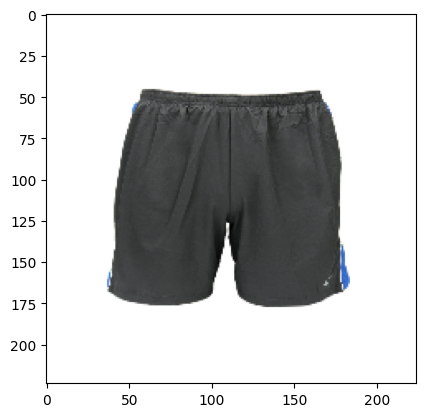

1/1 [==============================] - 0s 20ms/step


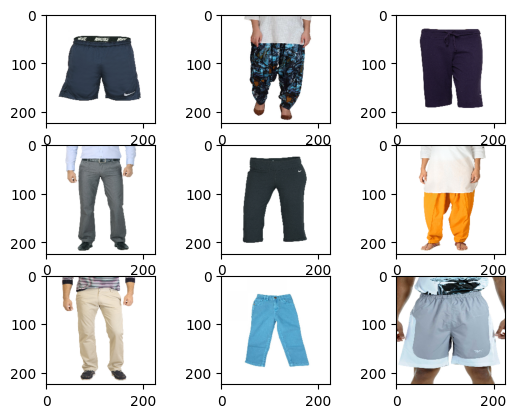

In [250]:
path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/10004.jpg'
cbir.show_image(path, 9)

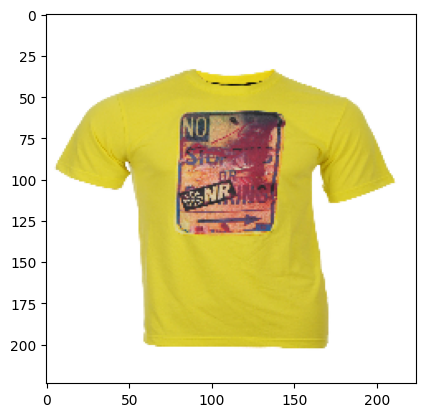

1/1 [==============================] - 0s 20ms/step


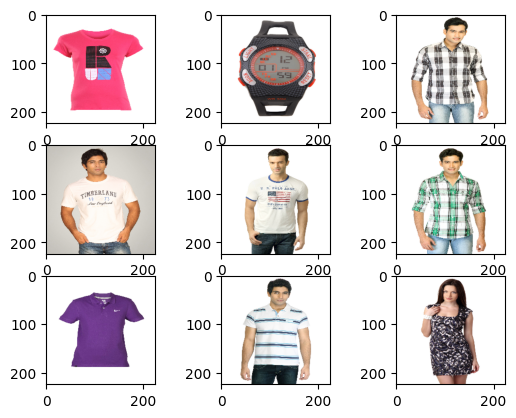

In [251]:
path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/10013.jpg'
cbir.show_image(path, 9)

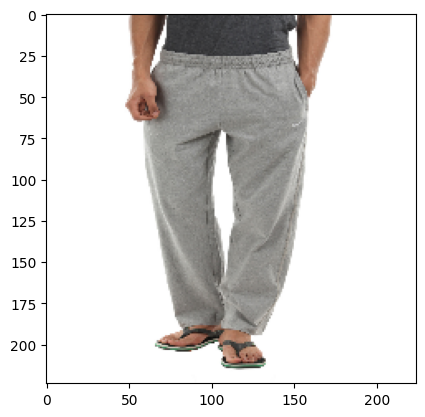

1/1 [==============================] - 0s 21ms/step


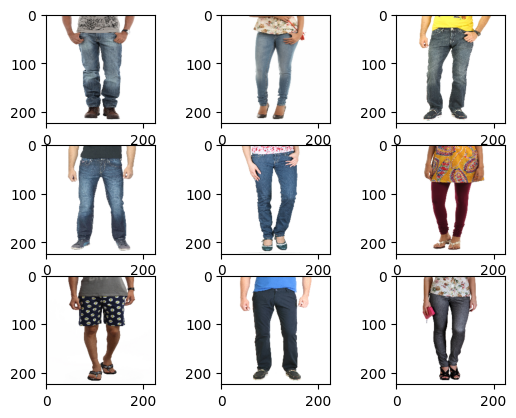

In [254]:
path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/10011.jpg'
cbir.show_image(path, 9)